In [1]:
from measure_disparity import measure_disparity
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

# Datasets
from aif360.datasets import MEPSDataset19
from aif360.datasets import MEPSDataset20
from aif360.datasets import MEPSDataset21

# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions \
    import load_preproc_data_adult,load_preproc_data_german,load_preproc_data_compas
# Explainers
from aif360.explainers import MetricTextExplainer

# Scalers
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Bias mitigation techniques
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import PrejudiceRemover
from aif360.algorithms.preprocessing.lfr import LFR

# LIME
from aif360.datasets.lime_encoder import LimeEncoder
import lime
from lime.lime_tabular import LimeTabularExplainer
from aif360.algorithms.preprocessing.optim_preproc_helpers.distortion_functions\
            import get_distortion_adult, get_distortion_german, get_distortion_compas
from aif360.algorithms.preprocessing.optim_preproc_helpers.opt_tools import OptTools
from aif360.algorithms.preprocessing.optim_preproc import OptimPreproc

np.random.seed(1)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
2023-02-28 21:03:52.737125: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 21:03:52.883237: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-28 21:03:53.698119: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object

In [2]:
print("The test of measure_disparity starts now!")
privileged_groups = [{"RACE": 1}]
unprivileged_groups = [{"RACE": 0}]
dataset_orig = MEPSDataset19()

The test of measure_disparity starts now!


In [3]:
dataset = dataset_orig
model = make_pipeline(StandardScaler(),
                      LogisticRegression(solver='liblinear', random_state=1))
fit_params = {'logisticregression__sample_weight': dataset.instance_weights}

lr_orig_panel19 = model.fit(dataset.features, dataset.labels.ravel(), **fit_params)
y_val_pred_prob = model.predict_proba(dataset.features)
pos_ind = np.where(model.classes_ == dataset.favorable_label)[0][0]
y_val_pred = (y_val_pred_prob[:, pos_ind] > 0.5).astype(np.float64)

str_y_val_pred_prob = []
for i in y_val_pred_prob:
    str_y_val_pred_prob.append(str(i.tolist()))
import pandas as pd
data_dic = {"Model prediction":str_y_val_pred_prob,"Binary outcome":dataset.labels.ravel(),"Model label":y_val_pred,"Sample weights":dataset.instance_weights,"Demographic data on protected and reference classes":dataset.protected_attributes.ravel()}

dataframe = pd.DataFrame(data_dic)

This dataset's SPD is 0.12412749579833537
This dataset's AOD is 0.12034131390194465
This dataset's EOD is 0.1957206775925332


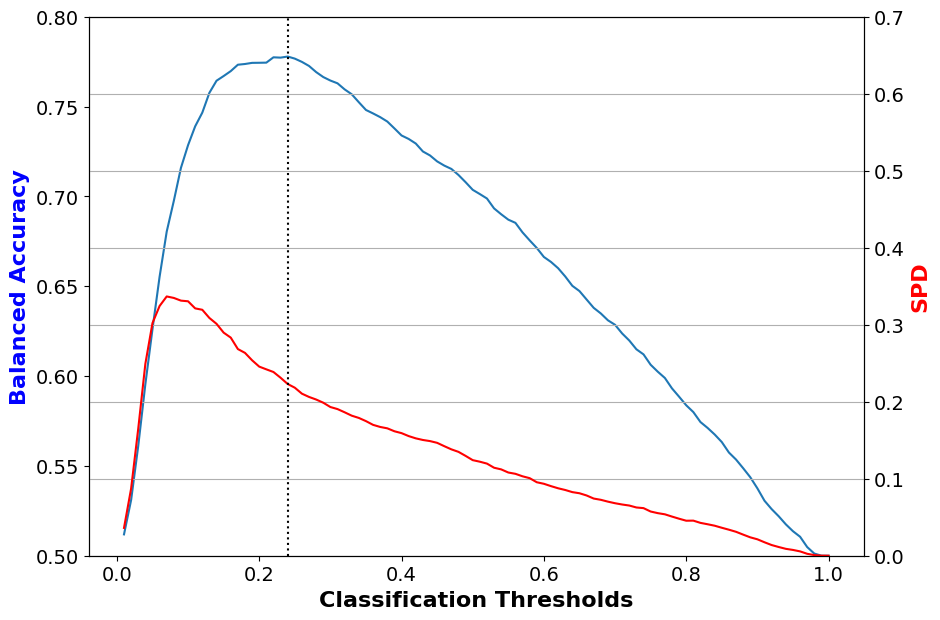

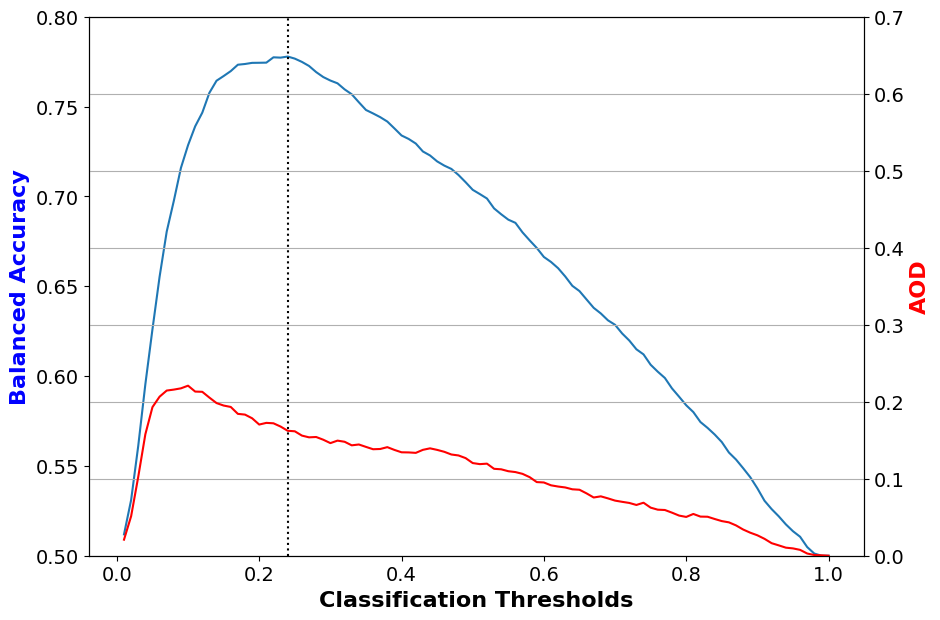

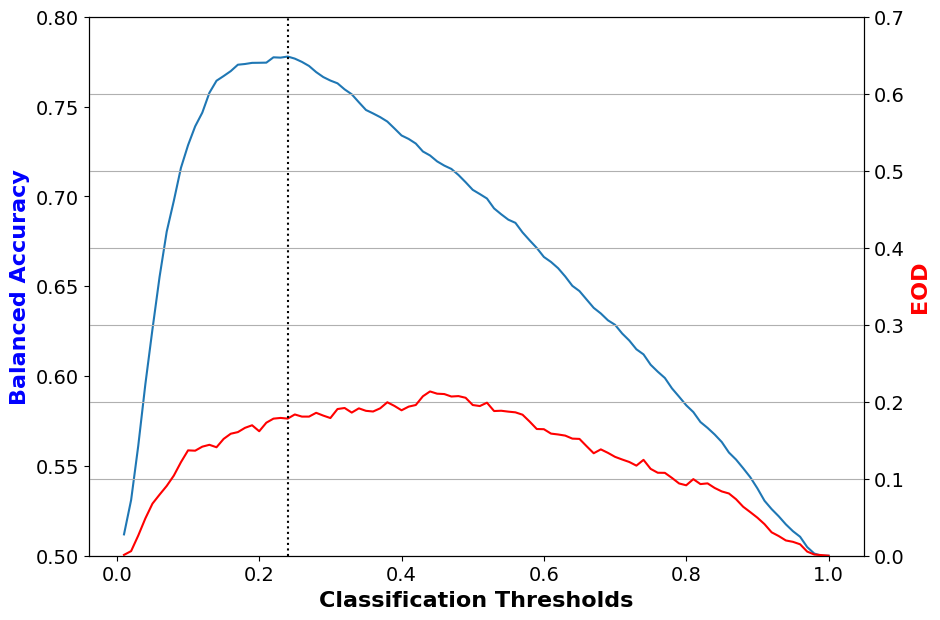

In [4]:
measure_disparity(dataframe)

In [5]:
print("The test of measure_disparity ends now!")

The test of measure_disparity ends now!


In [6]:
from aif360.datasets import AdultDataset, MEPSDataset19
from mitigate_disparity import MultiLevelReweighing as Reweighing, BiasRemoverModel
from aif360.metrics import BinaryLabelDatasetMetric
print("The test of mitigate_disparity starts now!")

dataset = MEPSDataset19()
multi_privileged_groups = [
    {"feature_name": "RACE", "privileged_value": 1, "level": 1},
]
multi_unprivileged_groups = [
    {"feature_name": "RACE", "unprivileged_value": 0, "level": 1},
]

privileged_groups2 = [{"RACE": 1}]
unprivileged_groups2 = [{"RACE": 0}]

rw = Reweighing(multi_unprivileged_groups, multi_privileged_groups)
trans_adult_dataset = rw.fit_transform(dataset)


metric_orig_adult = BinaryLabelDatasetMetric(
    dataset,
    unprivileged_groups=unprivileged_groups2,
    privileged_groups=privileged_groups2,
)
print('before reweighing ,race disparate impact is '+str(metric_orig_adult.disparate_impact()))
metric_trans_adult = BinaryLabelDatasetMetric(
    trans_adult_dataset,
    unprivileged_groups=unprivileged_groups2,
    privileged_groups=privileged_groups2,
)
print('after reweighing ,race disparate impact is '+str(metric_trans_adult.disparate_impact()))
brm_model = BiasRemoverModel()
brm_model.fit(dataset)
predic_prob = brm_model.predic_prob(dataset.features)
print('the probability of prediction is')
print(predic_prob)
print("The test of mitigate_disparity ends now!")

The test of mitigate_disparity starts now!
before reweighing ,race disparate impact is 0.49826823461176517
after reweighing ,race disparate impact is 0.9999999999999999
the probability of prediction is
[[0.38951022 0.61048978]
 [0.11901319 0.88098681]
 [0.93920721 0.06079279]
 ...
 [0.96191023 0.03808977]
 [0.70094193 0.29905807]
 [0.66722456 0.33277544]]
The test of mitigate_disparity ends now!
